In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
salario=pd.read_csv(r"..\Datos\salario.csv", engine='python',index_col=0,header=0,encoding='latin1')

In [3]:
ingreso = pd.read_csv(r"..\Datos\ingreso.csv", engine='python',index_col=0,header=0,encoding='latin1')

In [4]:
canasta=pd.read_csv(r"..\Datos\canasta_basica_serie.csv", engine='python',index_col=0,header=0,encoding='latin1')

In [5]:
salario_data=[salario['Salario'].iloc[i//12] for i in range(len(salario['Salario'])*12)]
ingreso_data=[ingreso['Ingreso'].iloc[i//12] for i in range(len(ingreso['Ingreso'])*12)]

In [6]:
date=[]
for i in range(len(canasta)):
    date.append(datetime.datetime(year=(2001+(i//12)), month=(1+i%12),day=1))
date_serie = pd.Series(date)

In [7]:
canasta_serie = pd.Series(data=canasta['canasta_basica'].values, index=date_serie)
salario_serie = pd.Series(data=salario_data[:len(canasta)], index=date_serie)
ingreso_serie = pd.Series(data=ingreso_data[:len(canasta)], index=date_serie)

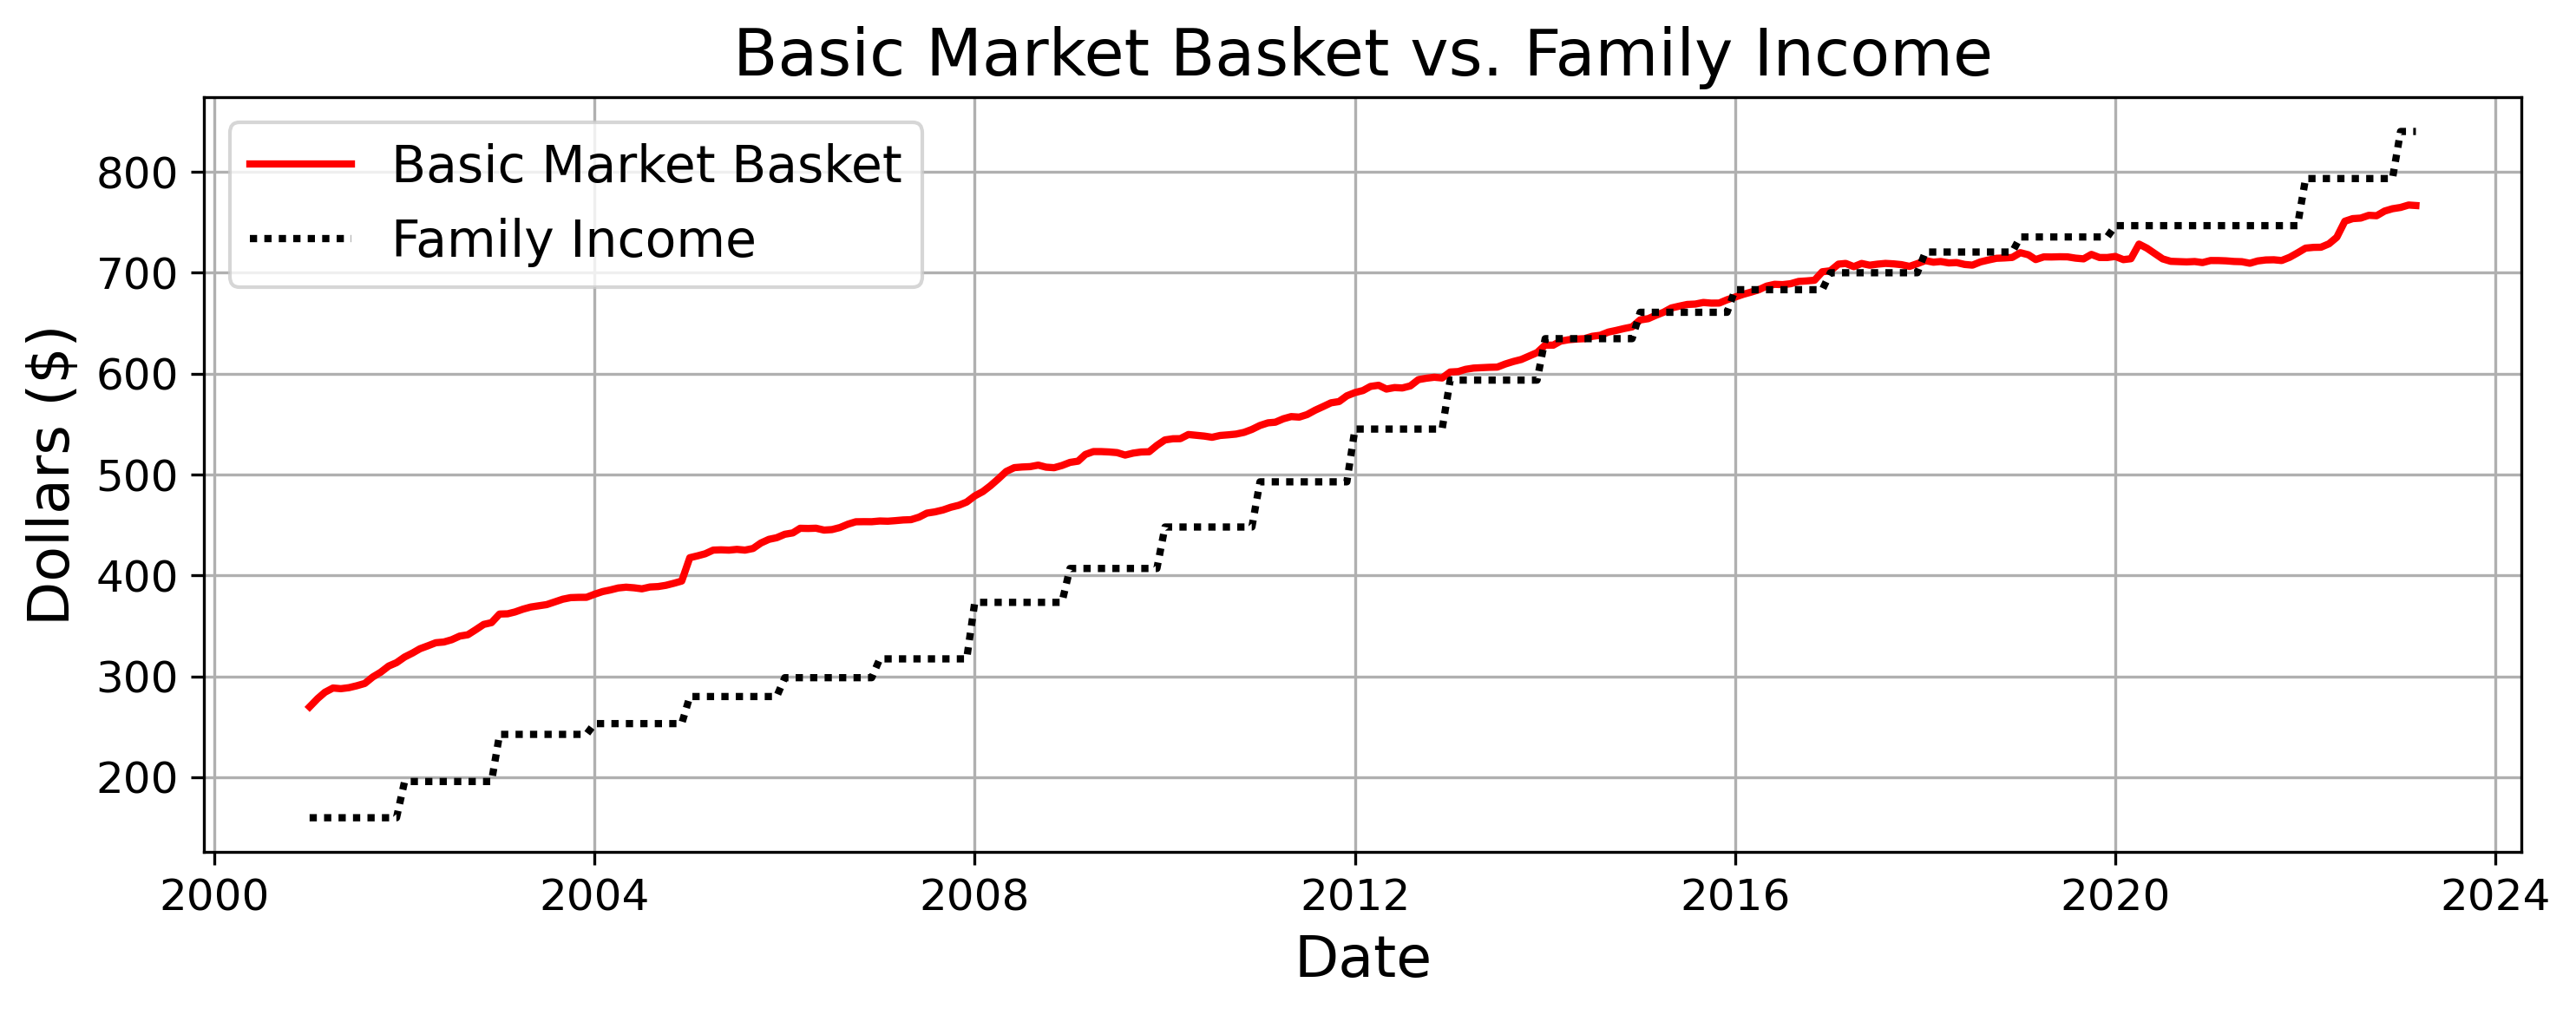

In [18]:
fs = 14
plt.figure(dpi=300, figsize=(10, 4), tight_layout=True)
plt.title('Basic Market Basket vs. Family Income',fontsize=fs+4)


plt.plot(canasta_serie,label='Basic Market Basket',linewidth=2,color='red')
plt.plot(ingreso_serie,label='Family Income',linewidth=2,linestyle=(0,(1,1)),color='black')

plt.xlabel("Date",fontsize=fs+2)
plt.ylabel("Dollars ($)",fontsize=fs+2)
plt.tick_params(axis='both', which='major', labelsize=fs-2)
plt.legend(fontsize=fs)
plt.grid(which='both')
plt.savefig(r"..\Figures\bmb_vs_fi.pdf", bbox_inches='tight')

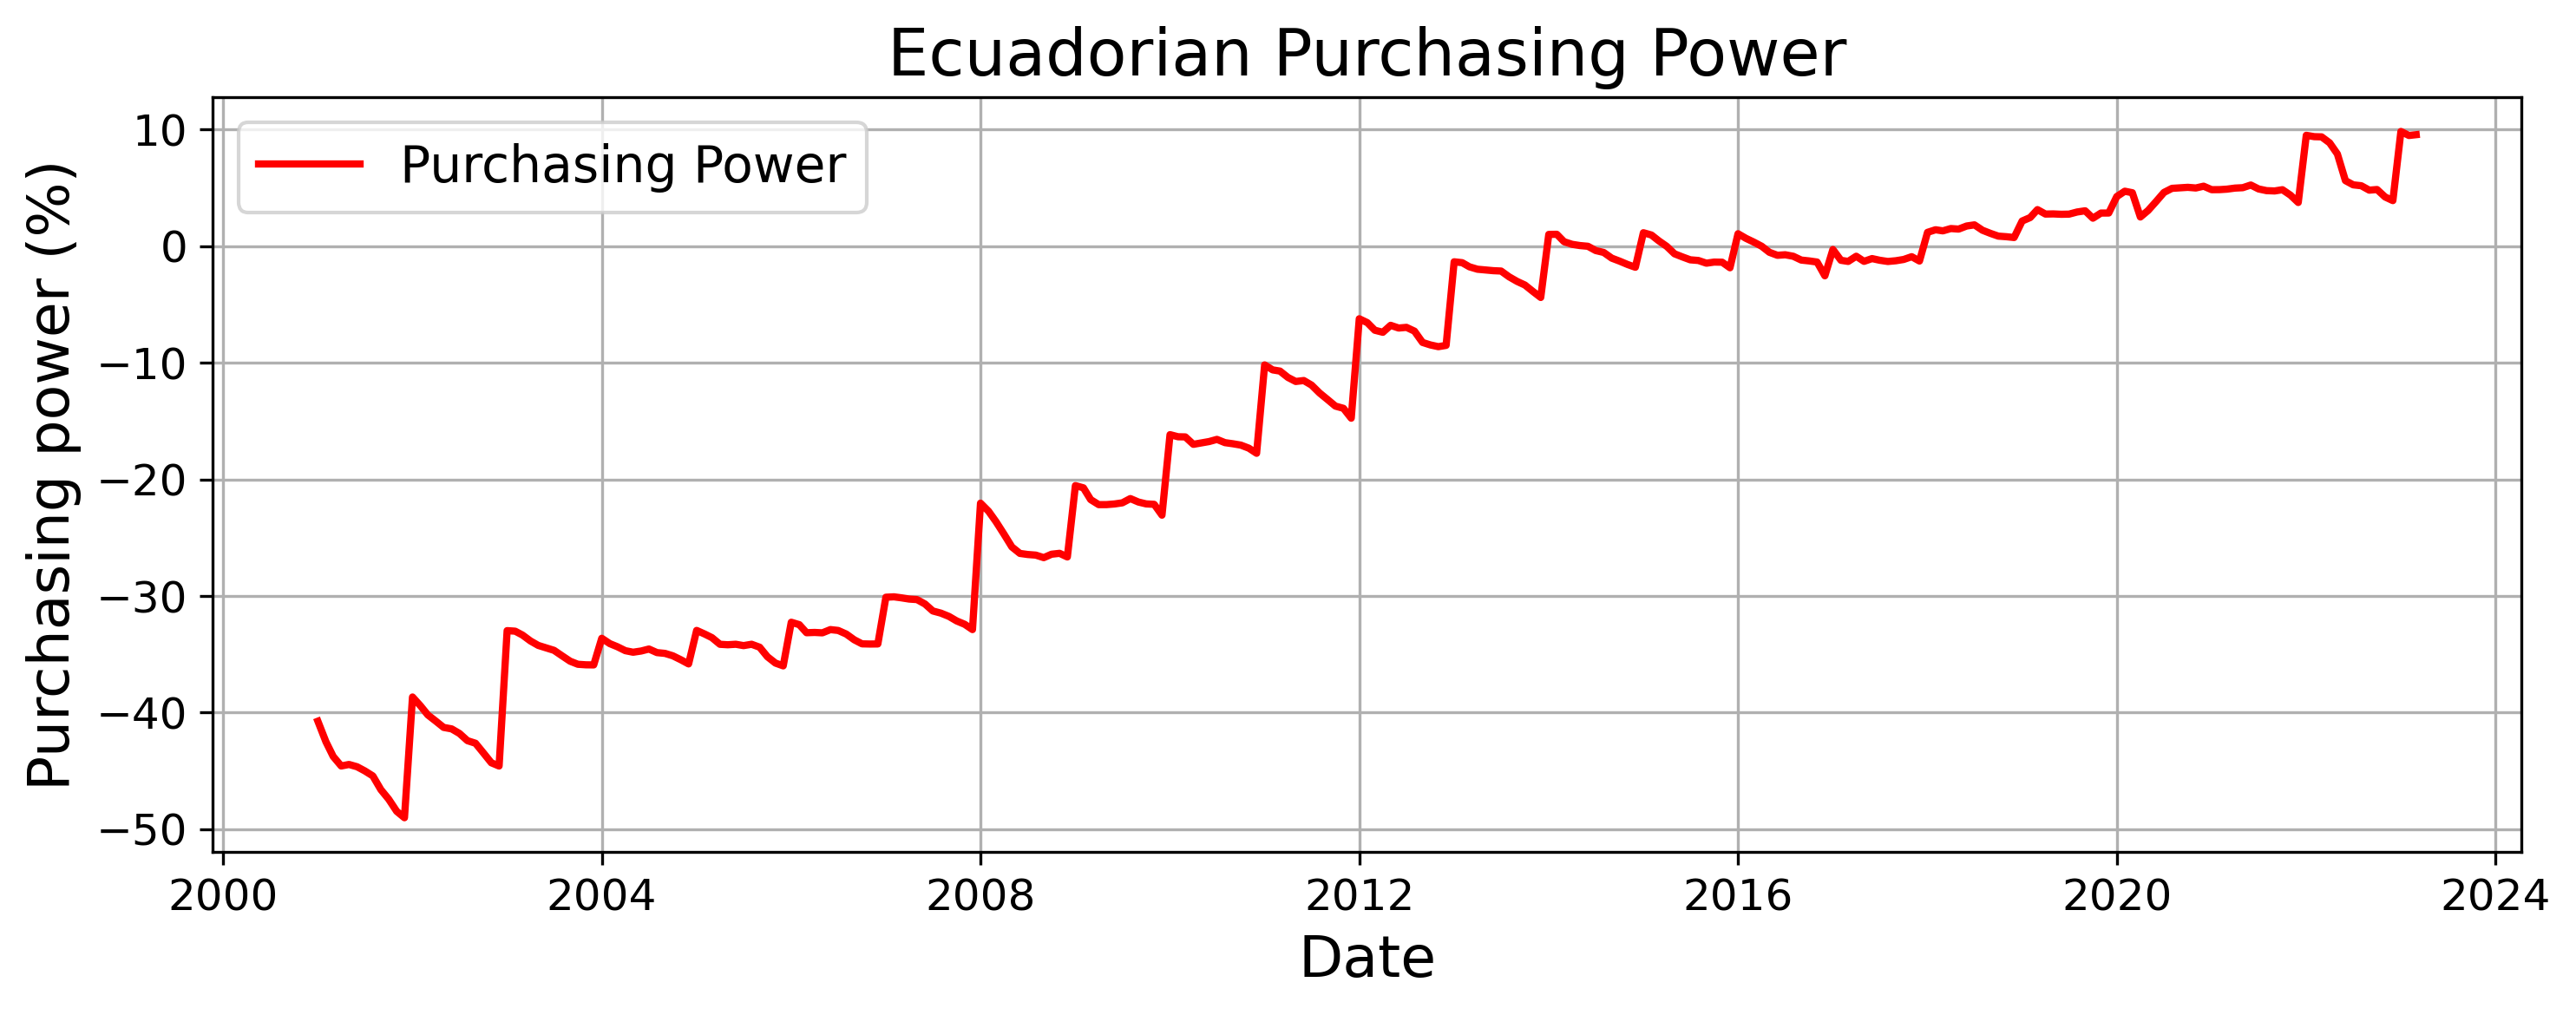

In [21]:
pp=(ingreso_serie - canasta_serie)*100/canasta_serie
plt.figure(dpi=300, figsize=(10, 4), tight_layout=True)
plt.title('Ecuadorian Purchasing Power',fontsize=fs+4)


plt.plot(pp,label='Purchasing Power',color='red',linewidth=2)

plt.xlabel("Date",fontsize=fs+2)
plt.ylabel("Purchasing power (%)",fontsize=fs+2)
plt.tick_params(axis='both', which='major', labelsize=fs-2)

plt.legend(fontsize=fs)
plt.grid(which='both')
plt.savefig(r"..\Figures\pp.pdf", bbox_inches='tight')

In [10]:
pred_df =pd.read_csv(r'..\Datos\sarima_prediction.csv', engine='python',index_col=None,header=None,encoding='latin1')
pred_df.columns = ['SARIMA']
svr_p =pd.read_csv(r'..\Datos\svr_prediction.csv', engine='python',index_col=None,header=None,encoding='latin1')
svr_p.columns = ['SVR']
mlp_p =pd.read_csv(r'..\Datos\mlp_prediction.csv', engine='python',index_col=None,header=None,encoding='latin1')
pred_df['SVR']=svr_p
pred_df['MLP']=mlp_p
pred_df.loc[-1]=[canasta_serie[-1]]*3
pred_df.sort_index(inplace=True)
pred_df

,SARIMA,SVR,MLP
-1,766.620000,766.620000,766.620000
0,774.759008,765.994855,770.189395
1,778.246418,764.714344,772.605555
2,781.348971,768.701092,774.215561
3,784.653470,769.924285,774.724668
4,788.108925,771.642943,775.079632
5,791.169777,773.337402,775.809422
6,794.436999,774.325186,776.504469
7,797.860443,776.020500,777.029423
8,800.879647,777.305905,777.637284


In [11]:
date_f=[]
for i in range(12):
    date_f.append(datetime.datetime(year=2023, month=i+1,day=1))
date_serief = pd.Series(date_f)

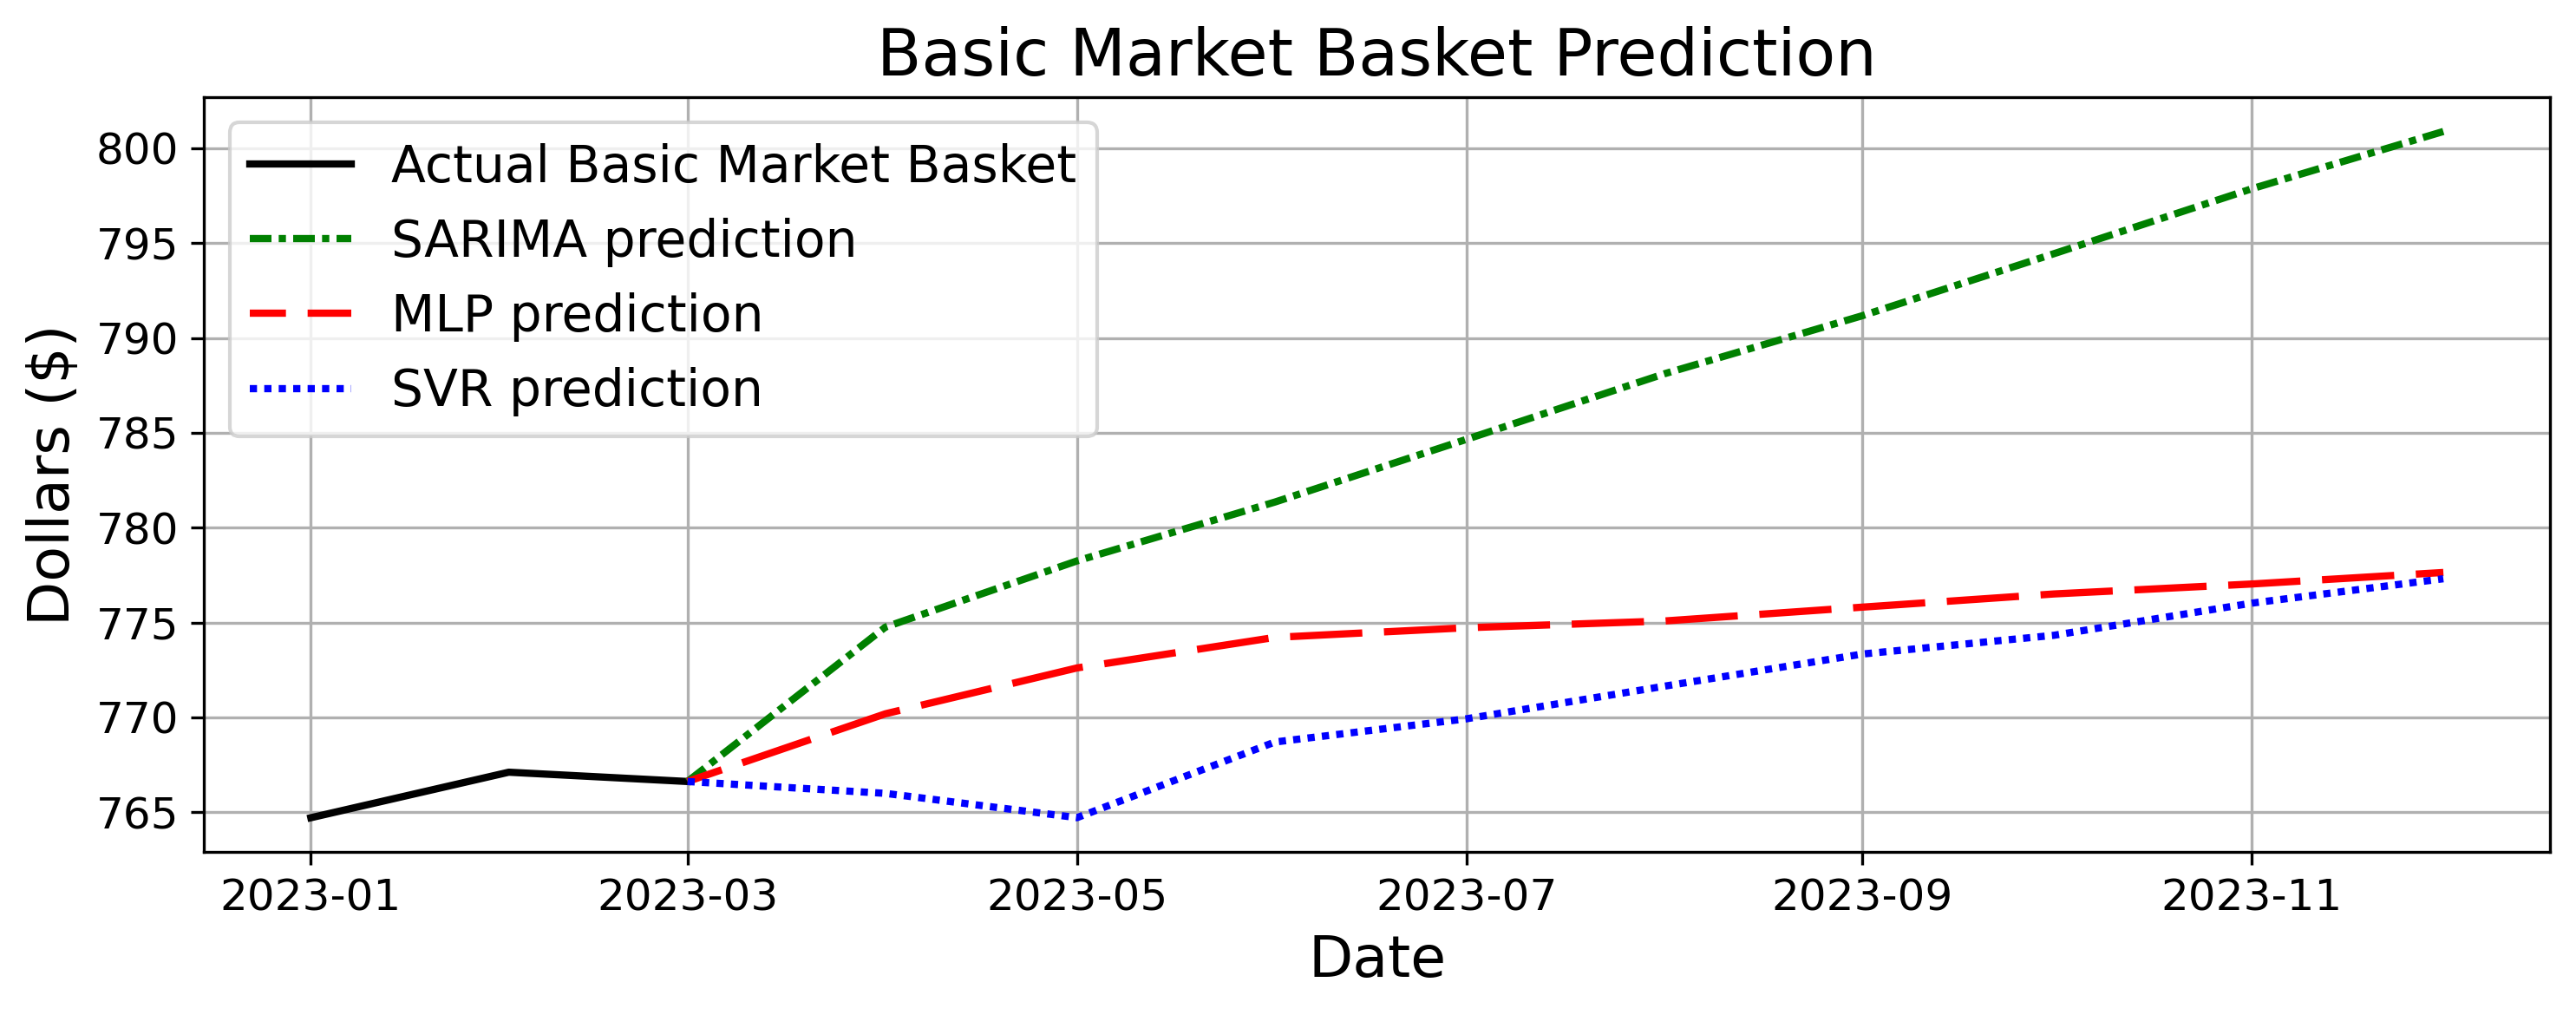

In [29]:
plt.figure(dpi=300, figsize=(10, 4), tight_layout=True)
plt.title('Basic Market Basket Prediction',fontsize=fs+4)

plt.plot(canasta_serie[-3:],label='Actual Basic Market Basket',linewidth=2,color='black')
plt.plot(date_serief[-10:],pred_df['SARIMA'],label='SARIMA prediction',linewidth=2,linestyle=(0,(3,1,1,1)),color='green')
plt.plot(date_serief[-10:],pred_df['MLP'],label='MLP prediction',linewidth=2,linestyle=(5,(10,3)),color='red')
plt.plot(date_serief[-10:],pred_df['SVR'],label='SVR prediction',linewidth=2,linestyle=(0,(1,1)),color='blue')


plt.xlabel("Date",fontsize=fs+2)
plt.ylabel("Dollars ($)",fontsize=fs+2)

plt.tick_params(axis='both', which='major', labelsize=fs-2)

plt.legend(fontsize=fs)
plt.grid(which='both')
plt.savefig(r"..\Figures\bmb_pred.pdf", bbox_inches='tight')

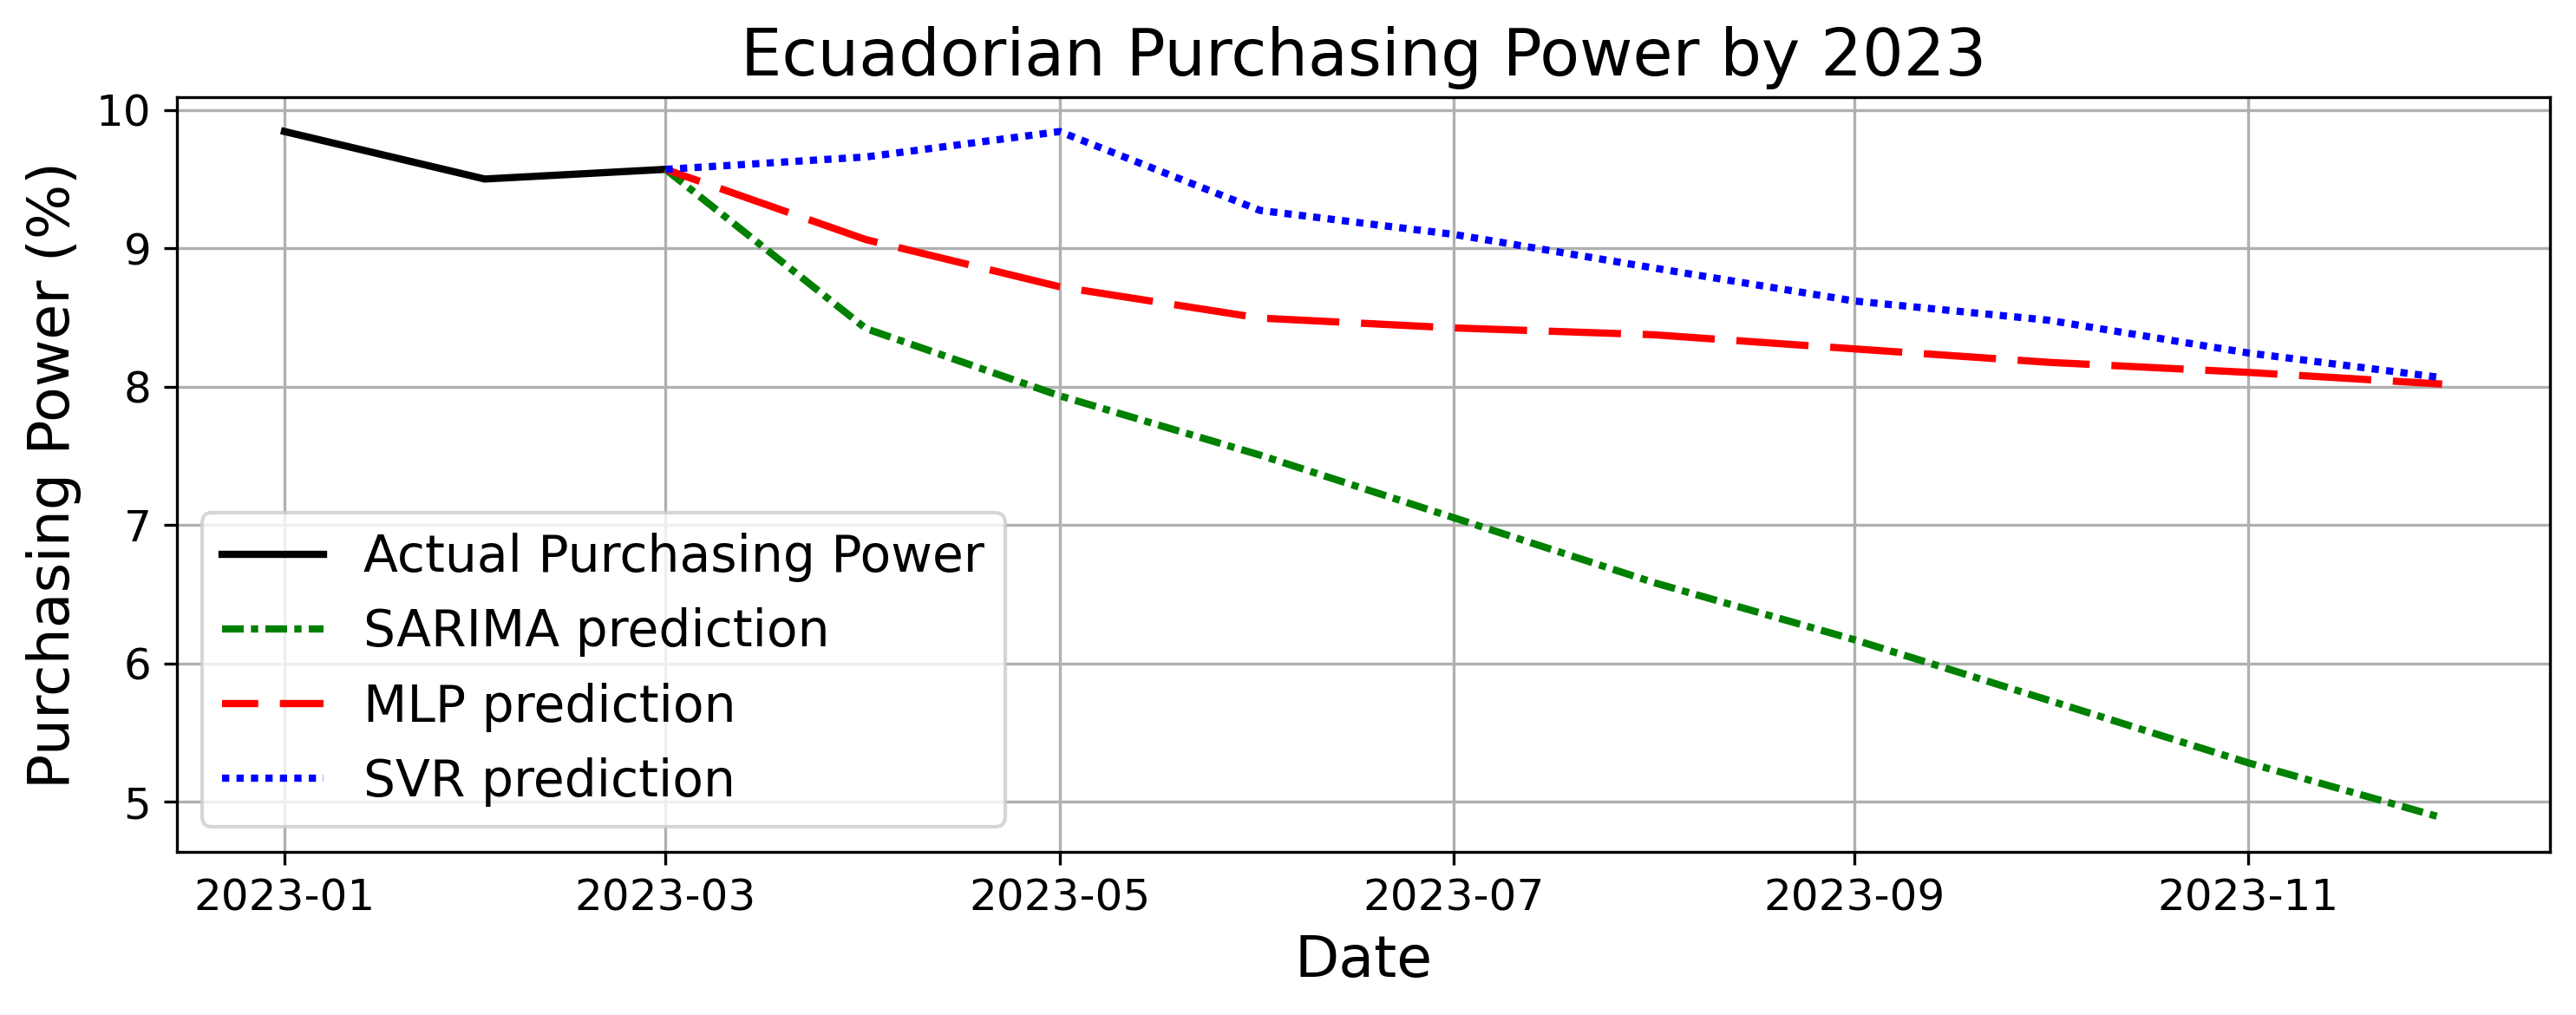

In [31]:
plt.figure(dpi=300, figsize=(10, 4), tight_layout=True)
plt.title('Ecuadorian Purchasing Power by 2023',fontsize=fs+4)

plt.plot((ingreso.loc[2023].values-canasta_serie[-3:])*100/canasta_serie[-3:],label='Actual Purchasing Power',linewidth=2,color='black')
plt.plot(date_serief[-10:],(ingreso.loc[2023].values-pred_df['SARIMA'])*100/pred_df['SARIMA'],label='SARIMA prediction',linewidth=2,linestyle=(0,(3,1,1,1)),color='green')
plt.plot(date_serief[-10:],(ingreso.loc[2023].values-pred_df['MLP'])*100/pred_df['MLP'],label='MLP prediction',linewidth=2,linestyle=(5,(10,3)),color='red')
plt.plot(date_serief[-10:],(ingreso.loc[2023].values-pred_df['SVR'])*100/pred_df['SVR'],label='SVR prediction',linewidth=2,linestyle=(0,(1,1)),color='blue')

plt.xlabel("Date",fontsize=fs+2)
plt.ylabel("Purchasing Power (%)",fontsize=fs+2)

plt.tick_params(axis='both', which='major', labelsize=fs-2)

plt.legend(fontsize=fs)
plt.grid(which='both')
plt.savefig(r"..\Figures\pp23.pdf", bbox_inches='tight')

In [83]:
fi = np.array([840]*12)
bmb = np.concatenate((canasta_serie[-3:].values, np.round(pred_df['SVR'].values,2)))
(fi-bmb).sum()

839.5999999999999